# Import used modules

In [1]:
import pandas as pd
import sys
sys.path.insert(0, '../src')
import benchmark_utils as bu
import analysis_utils as au

# Run Alignments for OpenCADD.superposition for the TK and CAMK Structures

Perform all pairwise alignments for the given sample structures. Every method performs 2500 alignments for the 50 tyrosine kinase and 50 CAMK structures. The benchmark is done with an Intel Core i5-1038NG7 CPU and 16 GB of RAM.

In [2]:
#bu.run_alignments(sample1_path="/Users/julian/PythonProjects/Bachelor/benchmark/TK_samples.txt", 
#                  sample2_path="/Users/julian/PythonProjects/Bachelor/benchmark/CAMK_samples.txt", 
#                  output_path="../data/OpenCADD_results/<NAME_OF_FILE>")

# Create a Dataframe containing the Alignments of all five Methods

The alignments for PyMol and ChimeraX MatchMaker are done in the respectively programs and are saved in seperate files. For the analysis, the DataFrames are combined.

In [3]:
columns = ["reference_id", "mobile_id", "method", "rmsd", 
           "coverage", "reference_size", "mobile_size", "time", 
           "SI", "MI", "SAS", "ref_name", "ref_group", "ref_species", 
           "ref_chain", "mob_name", "mob_group", "mob_species", "mob_chain"]
superposer_TK_CAMK = pd.read_csv("../data/OpenCADD_results/20211107_superposer_benchmark_TK_CAMK_DFGin.csv", names=columns)
pymol_TK_CAMK = pd.read_csv("/Users/julian/PythonProjects/Bachelor/benchmark/pymol/20211115_pymol_benchmark_TK_CAMK_refinement.csv", names=columns)
chimerax_TK_CAMK = pd.read_csv("../data/ChimeraX_results/20211113_mmaker_benchmark_TK_CAMK.csv", names=columns)
all_TK_CAMK = pd.concat([superposer_TK_CAMK, pymol_TK_CAMK, chimerax_TK_CAMK]).reset_index(drop=True)

### Compute the relative Coverage

The relative coverage is computed the following way:

coverage / min(lenght of structure 1, lenght of structure 2)

In [4]:
au.compute_rel_cov(all_TK_CAMK)

# Analysis

## General Checks

In [5]:
counts, nans, times = au.general_checks(all_TK_CAMK)

Check if every value is present.
It should be 2500 for every value, because there are 2500 alignments performed per method.

In [6]:
counts

,reference_id,mobile_id,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,ref_name,ref_group,ref_species,ref_chain,mob_name,mob_group,mob_species,mob_chain,rel_cov
method,,,,,,,,,,,,,,,,,,,
matchmaker,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500
mda,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500
mmligner,2500,2500,2498,2498,2498,2498,2498,2498,2498,2498,2500,2500,2500,2500,2500,2500,2500,2500,2498
pymol,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500
theseus,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500


Next, we check for missing alignments. Some Methods have problems with some structures. 

In this case, all alignments worked except two for MMLigner with the structure 5hhw.
These two entries are removed for further analysis.

In [7]:
nans

,reference_id,mobile_id,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,ref_name,ref_group,ref_species,ref_chain,mob_name,mob_group,mob_species,mob_chain,rel_cov
method,,,,,,,,,,,,,,,,,,,
mmligner,2,2,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,0


In [8]:
all_TK_CAMK[all_TK_CAMK["rmsd"].isna()]

,reference_id,mobile_id,method,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,ref_name,ref_group,ref_species,ref_chain,mob_name,mob_group,mob_species,mob_chain,rel_cov
3921,5hhw,6vru,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INSR,TK,Human,A,PIM1,CAMK,Human,A,NaN
3922,5hhw,4wsy,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INSR,TK,Human,A,PIM1,CAMK,Human,A,NaN


In [9]:
all_TK_CAMK = all_TK_CAMK.dropna()

During the computation of the alignments, the time is measured.  For all OpenCADD methods combined the CPU-time is just under 12.5 hours. The time for downloading the structures is not included.
PyMol align took less than a minute.

In [10]:
times

method
matchmaker     17.41
mda            18.29
mmligner      715.80
pymol           0.86
theseus        14.08
Name: time, dtype: float64

### Compute Mean and Median

In [11]:
mean, median = au.compute_mean_median(all_TK_CAMK)

In [12]:
mean

,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,rel_cov
method,,,,,,,,,
matchmaker,6.3234,245.8000,284.7200,281.2000,0.4178,7.0252,0.8142,2.5703,0.9035
mda,9.0286,247.2692,284.2800,281.1200,0.4390,9.9810,0.8612,3.6592,0.9091
mmligner,2.3544,218.2686,284.2626,281.1265,17.1929,2.9335,0.6857,1.0778,0.8029
pymol,2.4451,149.6132,284.7200,281.2000,0.0206,4.4326,0.7800,1.6256,0.5499
theseus,9.5277,247.3240,284.2800,281.1200,0.3379,10.5295,0.8666,3.8591,0.9093


In [13]:
median

,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,rel_cov
method,,,,,,,,,
matchmaker,5.7500,246.0,280.0,274.0,0.3803,6.3358,0.8122,2.3465,0.9071
mda,8.9708,247.0,280.0,274.0,0.4216,9.8174,0.8691,3.6640,0.9108
mmligner,2.3970,220.0,280.0,274.0,16.9158,2.8944,0.6832,1.0663,0.8067
pymol,2.1797,149.0,280.0,274.0,0.0198,3.9183,0.7740,1.4472,0.5483
theseus,9.4578,248.0,280.0,274.0,0.2928,10.4200,0.8755,3.8742,0.9108


## Create basic plots

It is easy to see in both plots, that MMLigner performs the best. Besides that, Theseus performs very similar to ChimeraX MatchMaker and PyMol align.

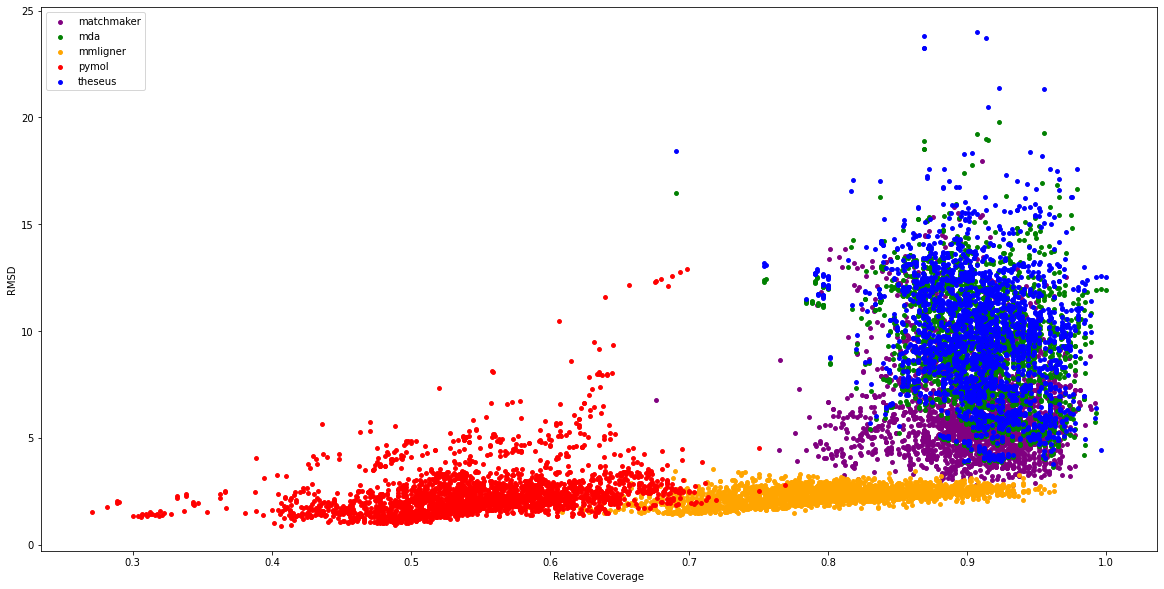

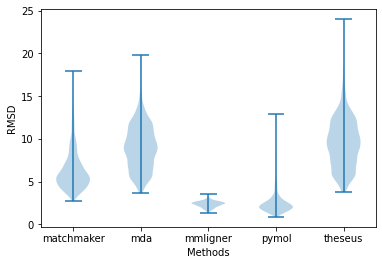

In [14]:
au.create_scatter_plot(all_TK_CAMK, path="../reports/figures/TK_CAMK_refinement")
au.create_violine_plot(all_TK_CAMK, path="../reports/figures/TK_CAMK_refinement")

## Check if data is normally distributed

The Kolmogorov-Smirnow-Test shows, that the values for RMSD, SI, MI, SAS and relative coverage are not normally distributed. But Theseus has a very similar distribution for the measures except the relative coverage. MMLigner performs the best for all measures except the relative coverage. MDA performs the worst for all measures.

Results of kstest:
KstestResult(statistic=0.9084519307377054, pvalue=0.0)
KstestResult(statistic=0.9807730189962389, pvalue=0.0)
KstestResult(statistic=0.734590141645466, pvalue=0.0)
KstestResult(statistic=0.792339435447772, pvalue=0.0)


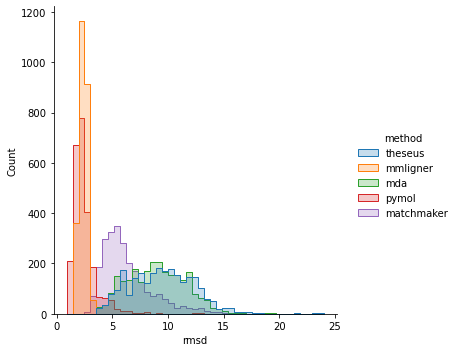

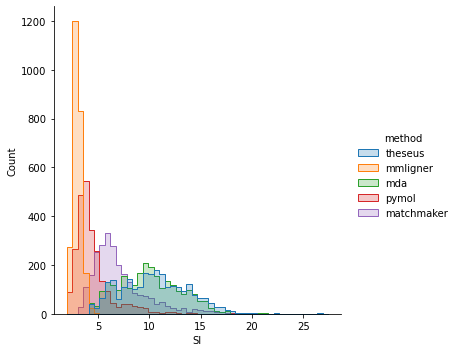

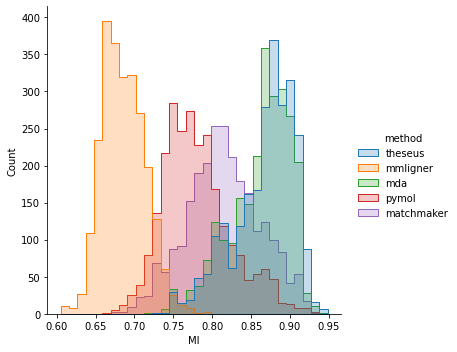

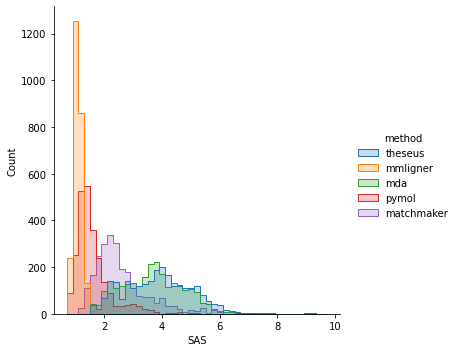

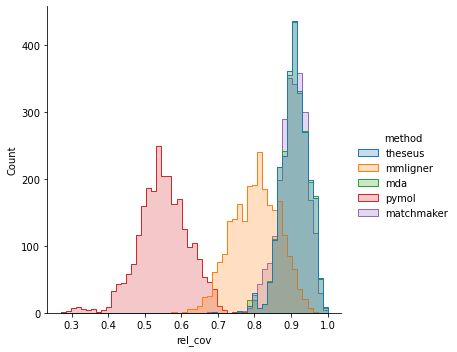

In [15]:
dist_tests = au.check_distribution(all_TK_CAMK, path="../reports/figures/TK_CAMK_refinement")

## Compute Correlation

Since the data is not distributed normally, the spearman correlation is used.

The three quality measures correlate very well with each other and with the rmsd. The quality measures also negatively correlate with the relative coverage, which means, the lower the relative coverage, the higher the quality measures. 

The time also negatively correlates with the quality measures, which means taking more time for an alignment produces better results. This correlation in this case is highly biased by MMLigner. It takes much more time than the other methods, but also yield overall the best results.

All three quality measures share the property, that lower values mean better alignments.

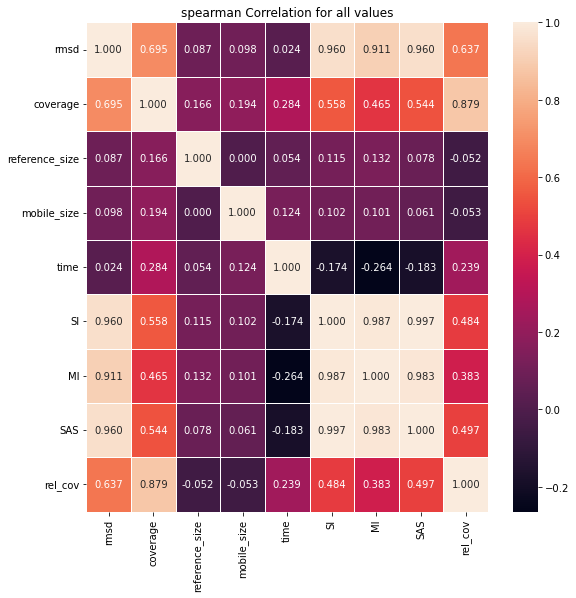

,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,rel_cov
rmsd,1.000000,0.695168,0.087412,0.097783,0.023635,0.960145,0.911050,0.960065,0.637491
coverage,0.695168,1.000000,0.165759,0.194172,0.284336,0.557762,0.464676,0.543606,0.879463
reference_size,0.087412,0.165759,1.000000,0.000343,0.053703,0.115072,0.131851,0.077836,-0.051947
mobile_size,0.097783,0.194172,0.000343,1.000000,0.123958,0.102483,0.101231,0.061100,-0.052831
time,0.023635,0.284336,0.053703,0.123958,1.000000,-0.174490,-0.264427,-0.183220,0.239417
SI,0.960145,0.557762,0.115072,0.102483,-0.174490,1.000000,0.986628,0.997321,0.483788
MI,0.911050,0.464676,0.131851,0.101231,-0.264427,0.986628,1.000000,0.982884,0.382713
SAS,0.960065,0.543606,0.077836,0.061100,-0.183220,0.997321,0.982884,1.000000,0.497139
rel_cov,0.637491,0.879463,-0.051947,-0.052831,0.239417,0.483788,0.382713,0.497139,1.000000


In [16]:
corr = au.compute_correlation(all_TK_CAMK, coeff="spearman", path="../reports/figures/TK_CAMK_refinement")
corr

## Check for significant differences

Because the data is not normally distributed, an ANOVA is not suitable. Therefore the Kruskal-Wallis-Test is performed. The RMSD and the three quality measures are significantly different for the groups.

In [17]:
kruskal = au.compute_kruskal(all_TK_CAMK)

Kruskal Wallis results for RMSD:
KruskalResult(statistic=9417.115846981638, pvalue=0.0)


Kruskal Wallis results for Similarity Index (SI):
KruskalResult(statistic=8898.247687773199, pvalue=0.0)


Kruskal Wallis results for Match Index (MI):
KruskalResult(statistic=8504.440480951429, pvalue=0.0)


Kruskal Wallis results for Structural Alignment Score (SAS):
KruskalResult(statistic=9000.284379821067, pvalue=0.0)


## Which groups are different

The statistics show, that all groups are significantly different from each other. Looking at the diagrams above it is still noticable, that PyMol, ChimeraX and Theseus are in the same area, but Theseus performs the worst out of the three.

In [18]:
significant, non_significant = au.compute_mannwhitneyu(all_TK_CAMK)

All significant results:
Result for rmsd with theseus and pymol:
MannwhitneyuResult(statistic=6195637.0, pvalue=0.0)
Result for rmsd with theseus and mmaker:
MannwhitneyuResult(statistic=5106922.0, pvalue=0.0)
Result for rmsd with theseus and mmligner:
MannwhitneyuResult(statistic=6245000.0, pvalue=0.0)
Result for rmsd with theseus and mda:
MannwhitneyuResult(statistic=3426463.0, pvalue=3.48724193669097e-09)
Result for rmsd with pymol and mmaker:
MannwhitneyuResult(statistic=195588.5, pvalue=0.0)
Result for rmsd with pymol and mmligner:
MannwhitneyuResult(statistic=2655438.5, pvalue=5.3325906533532804e-20)
Result for rmsd with pymol and mda:
MannwhitneyuResult(statistic=61756.0, pvalue=0.0)
Result for rmsd with mmaker and mmligner:
MannwhitneyuResult(statistic=6243514.0, pvalue=0.0)
Result for rmsd with mmaker and mda:
MannwhitneyuResult(statistic=1293329.0, pvalue=4.426184813888311e-282)
Result for rmsd with mmligner and mda:
MannwhitneyuResult(statistic=0.0, pvalue=0.0)
Result for SI

# Count the best alignments

For every pair of structures, the method that has the best quality measure is selected. The following statistics show how often a method had the best results for the quality measures.

In [19]:
best_results = au.count_best_results(all_TK_CAMK)

Counts of best values for the Similarity Index (SI):
mmligner      2349
pymol          149
matchmaker       2
Name: method, dtype: int64


Counts of best values for the Match Index (MI):
mmligner      2495
pymol            3
matchmaker       2
Name: method, dtype: int64


Counts of best values for the Structural Alignment Score (SAS):
mmligner      2348
pymol          150
matchmaker       2
Name: method, dtype: int64


Counts of best values for the Similarity Index (SI) without MMLigner:
pymol         2234
matchmaker     256
mda             10
Name: method, dtype: int64


Counts of best values for the Match Index (MI) without MMLigner:
pymol         1903
matchmaker     569
mda             28
Name: method, dtype: int64


Counts of best values for the Structural Alignment Score (SAS) without MMLigner:
pymol         2235
matchmaker     257
mda              8
Name: method, dtype: int64
